Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5199 - loss: 0.6922 - val_accuracy: 0.7088 - val_loss: 0.6643
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7060 - loss: 0.6119 - val_accuracy: 0.7902 - val_loss: 0.4693
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8063 - loss: 0.4355 - val_accuracy: 0.8360 - val_loss: 0.3879
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8491 - loss: 0.3545 - val_accuracy: 0.8580 - val_loss: 0.3398
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8821 - loss: 0.2908 - val_accuracy: 0.8718 - val_loss: 0.3089
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Accuracy: 0.8648
Confusion Matrix:
 [[10975  1525]
 [ 1856 10644]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87     12500
           1       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   ma

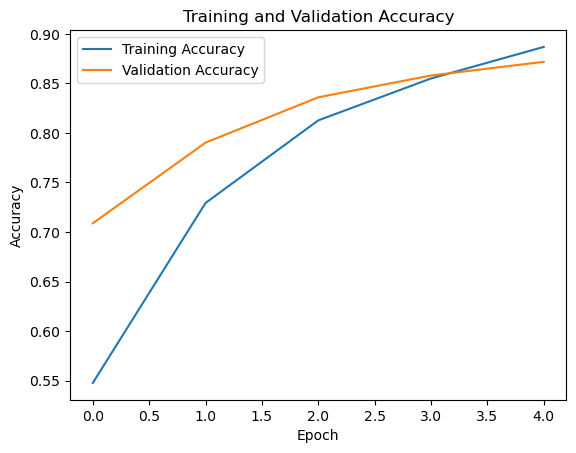

In [7]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the IMDb dataset
max_words = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build the CNN model
embedding_dim = 50
filters = 250
kernel_size = 3

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the correct learning rate parameter
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model and predict on the test set
y_pred = model.predict(x_test)
y_pred_binary = np.round(y_pred).flatten()

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
1. Natural Language Processing (NLP):

NLP is a subfield of artificial intelligence (AI) focused on the interaction between computers and human (natural) languages. 
The ultimate goal of NLP is to enable computers to read, understand, and generate human language in a way that is both meaningful and useful.

In your case, you are dealing with text data (IMDB reviews) and using a Convolutional Neural Network (CNN) for text classification, which is a form of NLP application.

Key NLP Tasks:

Text Classification: The task of categorizing text into predefined labels (like sentiment classification, spam detection, etc.).
In your code, the model performs binary classification (positive or negative sentiment of movie reviews).
Information Extraction (IE): This involves extracting useful information from unstructured text, such as identifying named entities (e.g., people, locations), relationships between entities, etc.

Text Generation: This is the task of generating new text based on the learned patterns from a dataset. Examples include generating poetry, machine translation, and text completion.

2. Text Processing:

Text processing is a crucial step in NLP to prepare the raw text data for further analysis or model training. This includes several key techniques:

Tokenization: The process of splitting a large text into smaller chunks, such as words or sentences. In your code, the imdb.load_data() function automatically tokenizes the text into sequences of integer-encoded words.

Padding: In your code, the pad_sequences() function is used to ensure all input sequences have the same length. Padding is essential for input consistency, especially when using neural networks like CNNs.

Vectorization: This is the process of converting text into numerical representations. In the code, the Embedding layer is used to convert words into dense vectors (word embeddings) that capture semantic relationships between words.

3. Text Classification:

Text classification is the process of categorizing text into predefined classes or labels. 

It’s one of the most common NLP tasks, and there are various approaches to solve it, ranging from traditional machine learning techniques to deep learning models like CNNs and RNNs.

In your code, the goal is to perform sentiment analysis on IMDB movie reviews, classifying each review as either positive or negative. 

This is done using a CNN architecture that is well suited for capturing hierarchical patterns in text.

CNN for Text Classification: CNNs, though originally designed for image data, are also effective for text classification tasks. They can capture local patterns (such as n-grams) in the text, making them useful for sentiment analysis.

Binary Cross-Entropy Loss: The model uses binary cross-entropy as the loss function since it is a binary classification problem (positive vs. negative).

4. Text Generation:

Text generation involves the creation of new, coherent text based on an initial input or seed text. 

This task can be accomplished with deep learning models such as Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, and Transformer-based architectures (like GPT-3).

While your code does not directly perform text generation, an understanding of text generation models helps to appreciate how similar models are trained on large corpora to generate human-like text. 

Applications include chatbot responses, auto-completion, and creative writing.

5. Information Extraction (IE):

Information extraction (IE) is a process in NLP that automatically identifies structured information from unstructured text. 

The goal is to extract useful pieces of information, such as entities, relationships, and facts, which can then be used in other applications like knowledge graphs or question answering.

Named Entity Recognition (NER): A sub-task of information extraction that focuses on identifying named entities in the text, such as names of people, organizations, and locations.

Relationship Extraction: Identifying relationships between entities (e.g., "person X works at company Y").

6. Evaluation Metrics:

In your code, you are evaluating the model performance using metrics such as accuracy, confusion matrix, and classification report.

Accuracy: Measures the percentage of correct predictions. For binary classification, accuracy is a common metric.

Confusion Matrix: A table used to evaluate the performance of a classification model. It shows the counts of true positives, false positives, true negatives, and false negatives.

Classification Report: Provides detailed evaluation metrics, such as precision, recall, F1-score, and support. 
These metrics help assess the model’s ability to make correct predictions, especially when dealing with imbalanced datasets.

7. Model Architecture:

The architecture of the CNN in your code involves several important layers, each serving a specific purpose:

Embedding Layer: This layer is used to convert the input text (words) into dense vectors that capture semantic meaning. It is initialized with random values and gets updated during the training process.

Convolutional Layer: These layers are used to capture local patterns in the text. In the case of text, they can detect word n-grams, like certain phrases or combinations of words that are indicative of sentiment.

Global Max Pooling: After applying convolutional layers, a pooling layer reduces the dimensionality by selecting the most prominent feature (e.g., the most important n-gram pattern).

Dense Layer: These fully connected layers help the model make predictions based on the learned features. In your code, these layers are used to make the final sentiment classification.

Dropout: Dropout is a regularization technique that helps prevent overfitting by randomly setting some of the activations to zero during training.

Conclusion:

The code provided is an implementation of a deep convolutional neural network for text classification. It showcases the use of CNNs for NLP tasks, specifically sentiment analysis on the IMDB dataset. 

Key concepts such as tokenization, padding, embedding, convolutional layers, and evaluation metrics are central to understanding how the model works.